# EDA using basic data functions with Python

Import packages and libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Read in the 2018 lightning strike dataset.
df = pd.read_csv('eda_using_basic_data_functions_in_python_dataset1.csv')

In [7]:
# Inspect the first 10 rows.
df.head(10)


#center_point_geom - is the longitude and latitude of the strikes

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [4]:
df.shape


#to determine how many rows and columns of data there are in total is to use df.shape

(3401012, 3)

In [5]:
# Get more information about the data, including data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


`info` will provide the total number of rows (3,401,012) and columns (3). It will also state the names and data types of each column, as well as the size of the dataframe in memory. 

here `date` column is an 'object' type rather than a 'date' type. Objects are strings. When dates are encoded as strings, they cannot be manipulated as easily. Converting string dates to datetime will enable you to work with them much more easily.

So im converting to datetime using the pandas function `to_datetime()`.

# Convert the date column to datetime

In [6]:
# Convert date column to datetime
df['date']= pd.to_datetime(df['date'])

### Calculate the days with the most strikes


In Discovering, I want to get an idea of the highest data points. For this dataset, I calculate the top 10 days of 2018 with the most number of lightning strikes using the `groupby()`, `sum()`, and `sort_values()` functions from pandas.

When using `groupby()` on the date column, the function combines all rows with the same date into a single row. 

Then, using `sum()` performs a sum calculation on all other summable columns. In this case, I am summing all the lightning strikes that happened on each day. Notice that the `center_point_geom` column is not included in the output. That's because, as a string object, this column is not summable. 

Finally, `sort_values()` returns the results in descending order of total strikes for each day in the data.

In [9]:
# Calculate days with most lightning strikes.
df.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10) 


#A common mistake among data professionals is using count() instead of sum(), and vice versa.
#In this case, count() would return the number of occurrences of each date in the dataset, which is not the desired result.

C:\Users\Owner\AppData\Local\Temp\ipykernel_16588\1775778919.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10)


,number_of_strikes
date,
2018-08-29,1070457
2018-08-17,969774
2018-08-28,917199
2018-08-27,824589
2018-08-30,802170
2018-08-19,786225
2018-08-18,741180
2018-08-16,734475
2018-08-31,723624


# Extract the month data


Next, i  extract the month data from the `date` column and add that extracted month data into a new column called `month`. `dt.month` extracts just the month information (as a numeric value) from the date. This is why converting the `date` column to datetime is very useful. 

In [11]:
# Create a new `month` column
df['month'] = df['date'].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


# Calculate the number of strikes per month


Now, i will sort our values by most strikes per month. Use `groupby()`, `sum()` and `sort_values()` from pandas again.

In [12]:
# Calculate total number of strikes per month
df.groupby(['month']).sum().sort_values('number_of_strikes', ascending=False).head(12)

C:\Users\Owner\AppData\Local\Temp\ipykernel_16588\2402520407.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['month']).sum().sort_values('number_of_strikes', ascending=False).head(12)


,number_of_strikes
month,
8,15525255
7,8320400
6,6445083
5,4166726
9,3018336
2,2071315
4,1524339
10,1093962
1,860045


# Convert the month number to text 

In [14]:
# Create a new `month_txt` column.
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan


# Create a new dataframe

The objective is to plot the total number of strikes per month as a bar graph. To help with the plotting, i will create a new dataframe called `df_by_month`. This will allow me to easily access the month, month text, and total number of strikes for each month. 

In [15]:
# Create a new helper dataframe for plotting.
df_by_month = df.groupby(['month','month_txt']).sum().sort_values('month', ascending=True).head(12).reset_index()
df_by_month

C:\Users\Owner\AppData\Local\Temp\ipykernel_16588\4268167679.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_month = df.groupby(['month','month_txt']).sum().sort_values('month', ascending=True).head(12).reset_index()


,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


# Make a bar chart


Im creating a bar chart. Pyplot's `plt.bar()` function takes positional arguments of `x` and `height`, representing the data used for the x- and y- axes, respectively. The x-axis will represent months, and the y-axis will represent strike count.

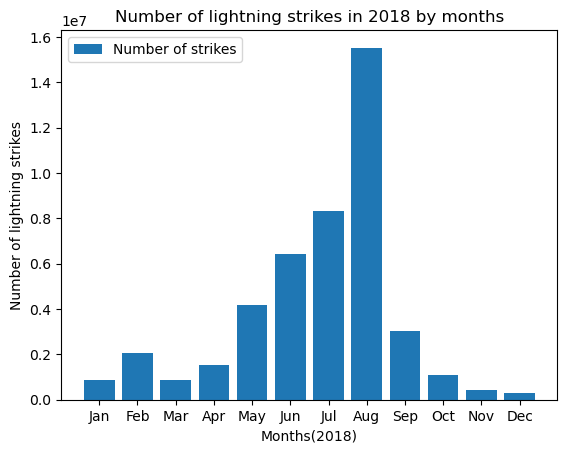

In [16]:
plt.bar(x=df_by_month['month_txt'],height= df_by_month['number_of_strikes'], label="Number of strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()
plt.show()